# 03. 나이-점수 간 상관 관계 및 회귀 분석

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from pathlib import Path

import os

DATA_PATH = Path("../data/processed/cleaned_student_scores.csv")
FIG_PATH = Path("../reports/figures/age_score_regression.png")

os.makedirs(FIG_PATH.parent, exist_ok=True)

df = pd.read_csv(DATA_PATH)

df_clean = df.dropna(subset=['정제된_나이','정제된_점수']).copy()
df_clean.shape


(106, 10)

### 피어슨 상관계수 계산

상관계수는 두 수치형 변수 간 선형 관계의 강도와 방향을 나타낸다.

- `+1`: 완전한 양의 선형 관계
- `0`: 무상관
- `-1`: 완전한 음의 선형 관계

In [10]:
corr, p_value = pearsonr(df_clean['정제된_나이'], df_clean['정제된_점수'])
print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-value: {p_value:.4f}")

피어슨 상관계수: -0.08
p-value: 0.4360


### 회귀선 시각화 (regplot 사용)

Seaborn의 `regplot`을 사용하여 회귀선과 산점도를 동시에 시각화한다.

-`ci=None`: 신뢰구간 제거
-`scatter_kws`: 점 크기와 투명도 조정

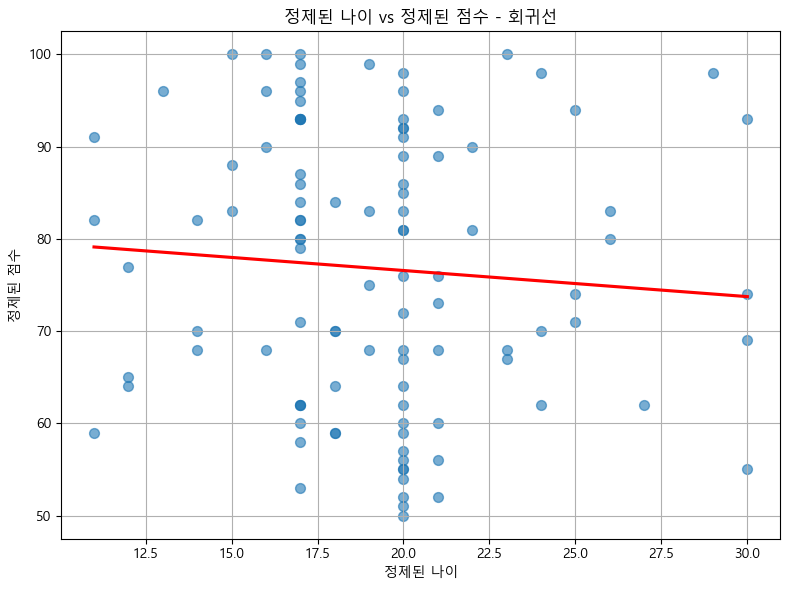

In [11]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(8, 6))
sns.regplot(x='정제된_나이', y='정제된_점수', data=df_clean, ci=None,
            scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('정제된 나이 vs 정제된 점수 - 회귀선')
plt.xlabel('정제된 나이')
plt.ylabel('정제된 점수')
plt.grid(True)
plt.tight_layout()
plt.savefig(FIG_PATH)
plt.show()

### 회귀선 수치 계산 (sklearn 사용)

scikit-learn의 `LinearRegression`을 사용하여 회귀식을 직접 계산한다.

- 종속 변수: `정제된_점수`
- 독립 변수: `정제된_나이`
- 목표 회귀식: **y = a * x + b**

In [12]:
x = df_clean[['정제된_나이']]
y = df_clean['정제된_점수']

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(x, y)

print(f"회귀식: y = {slope:.2f} * 나이 + {intercept:.2f}")
print(f"결정계수 R²: {r_squared:.4f}")


회귀식: y = -0.28 * 나이 + 82.24
결정계수 R²: 0.0058


### 회귀 해석

- **상관계수**: `거의 없음` 정도의 `음`의 선형 관계

- **회귀식**: 점수 = -0.28 x 나이 + 82.24

- **R²**: 0.006 → 전체 점수 변동 중 약 0.6%를 나이로 설명 가능

> 따라서, 나이와 점수 간에는 **`유의미하지 않은` 선형 관계**가 존재한다고 해석할 수 있다

### 회귀 해석

- **상관계수**: -0.08 → {
    '강한' if abs(-0.08) > 0.7
    else '중간' if abs(-0.08) > 0.5
    else '약한' if abs(-0.08) > 0.3
    else '거의 없음'
} 정도의 {'양' if -0.08 > 0 else '음'}의 선형 관계

- **회귀식**: 점수 = -0.28 x 나이 + 82.24

- **R²**: 0.006 → 전체 점수 변동 중 약 0.6%를 나이로 설명 가능

> 따라서, 나이와 점수 간에는 **{ '유의미한' if 0.4360 < 0.05 else '유의미하지 않은' } 선형 관계**가 존재한다고 해석할 수 있다